# Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

# Data collection and description

In [2]:
coca = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
coca1 = coca.copy()

In [5]:
coca1.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
Quarter,Q1_86,Q2_86,Q3_86,Q4_86,Q1_87,Q2_87,Q3_87,Q4_87,Q1_88,Q2_88,...,Q1_94,Q2_94,Q3_94,Q4_94,Q1_95,Q2_95,Q3_95,Q4_95,Q1_96,Q2_96
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996,2104.411995,2014.362999,1991.746998,1869.049999,2313.631996,...,3352.0,4342.0,4461.0,4017.0,3854.0,4936.0,4895.0,4333.0,4194.0,5253.0


In [6]:
coca1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
coca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
coca1.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [9]:
coca1.dtypes

Quarter     object
Sales      float64
dtype: object

In [10]:
#We will extract Quarter values and Year values separately from 'Quarter column'

In [11]:
coca1['Quarters'] = 0
coca1['Year'] = 0
for i in range(42):
    p = coca1["Quarter"][i]
    coca1['Quarters'][i]= p[0:2]
    coca1['Year'][i]= p[3:5]

In [12]:
coca1

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [13]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(coca1['Quarters']))
coca1 = pd.concat([coca1,Quarters_Dummies],axis = 1)
coca1.head()


,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


# Visualization

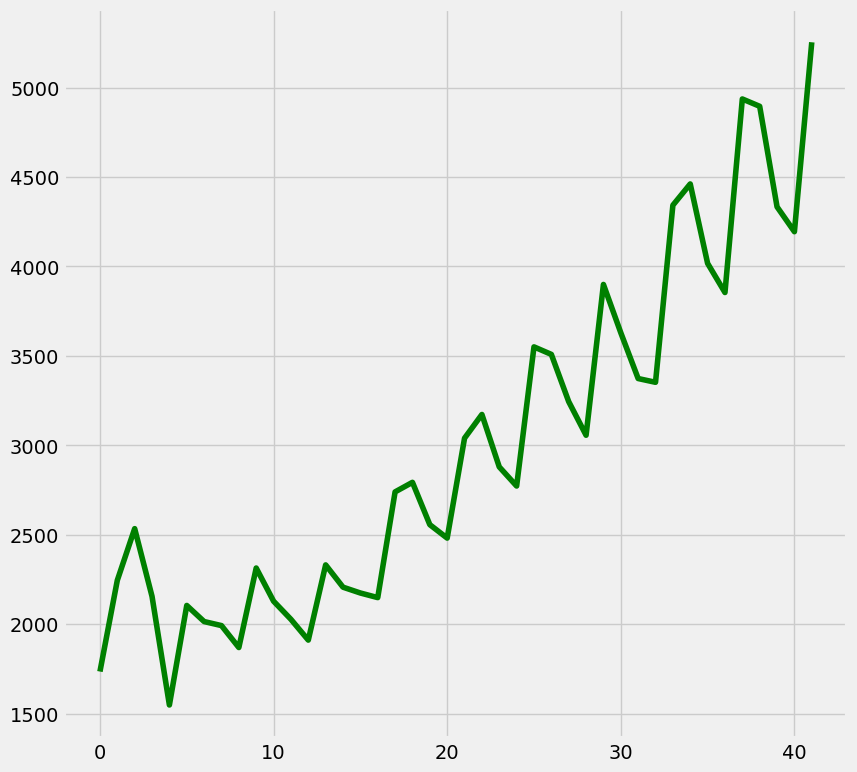

In [14]:
plt.figure(figsize=(9,9))
plt.plot(coca1["Sales"],color ="green",linewidth=4)

<Axes: >

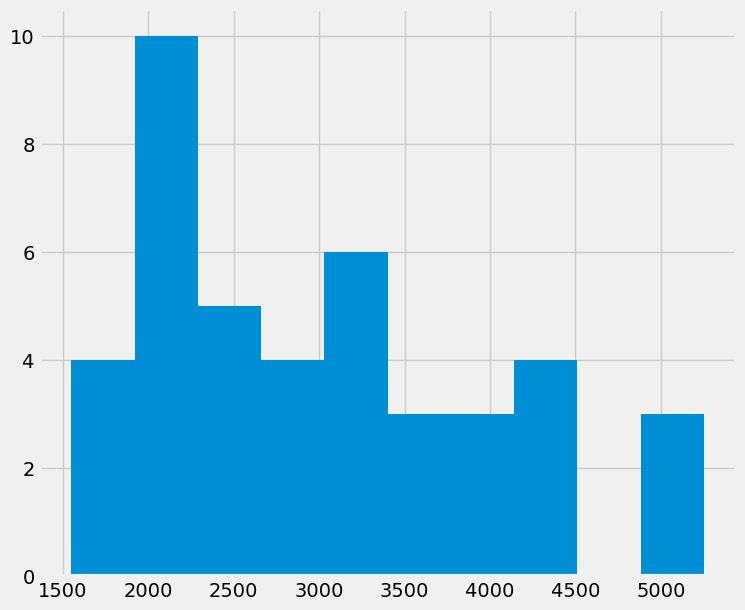

In [15]:
#Histogram
coca1["Sales"].hist(figsize=(8,7))

<Axes: ylabel='Density'>

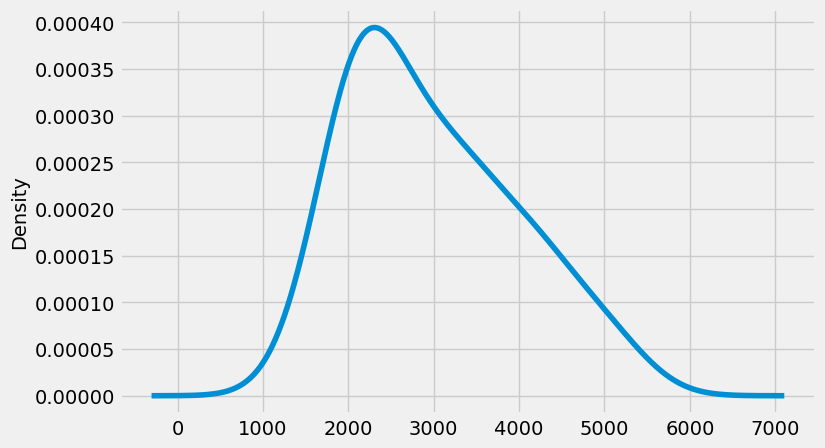

In [16]:
#Density plot
coca1['Sales'].plot(kind = 'kde', figsize=(8,5))


<Axes: xlabel='Quarters', ylabel='Sales'>

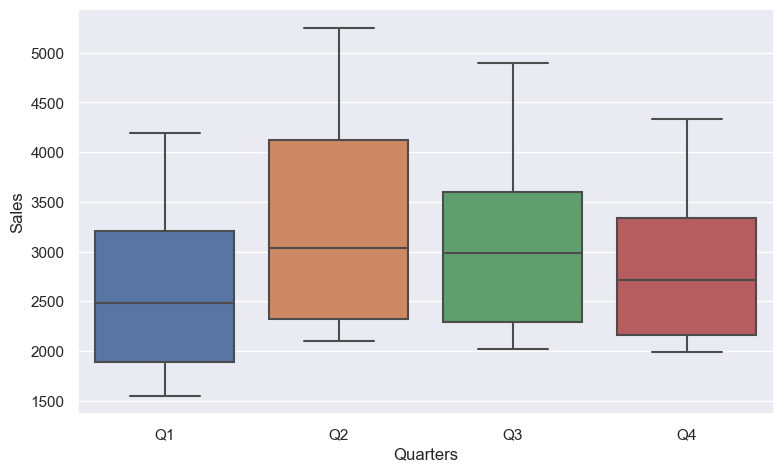

In [17]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=coca1)

<Axes: xlabel='Year', ylabel='Sales'>

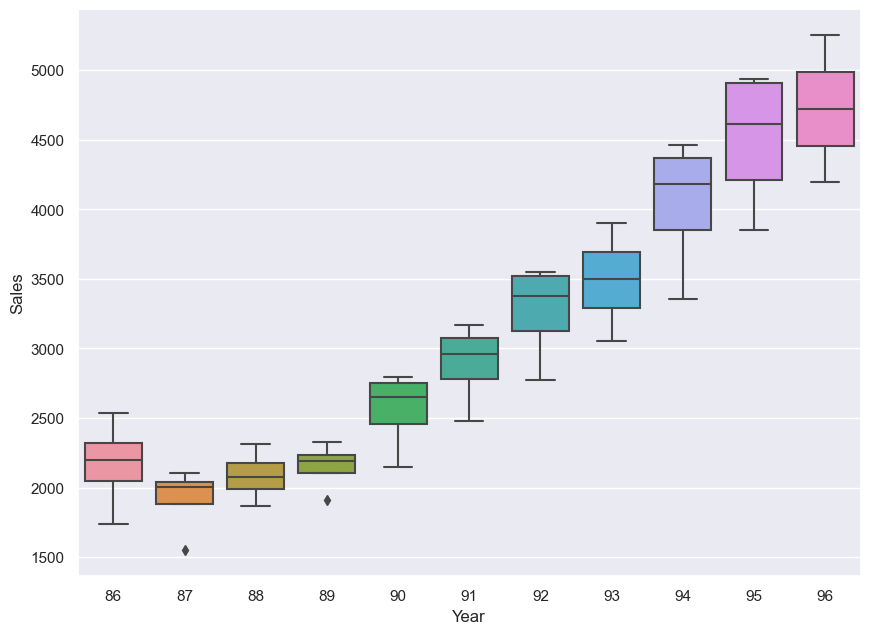

In [18]:
# boxplot of Years Vs. Sales
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x="Year",y="Sales",data=coca1)


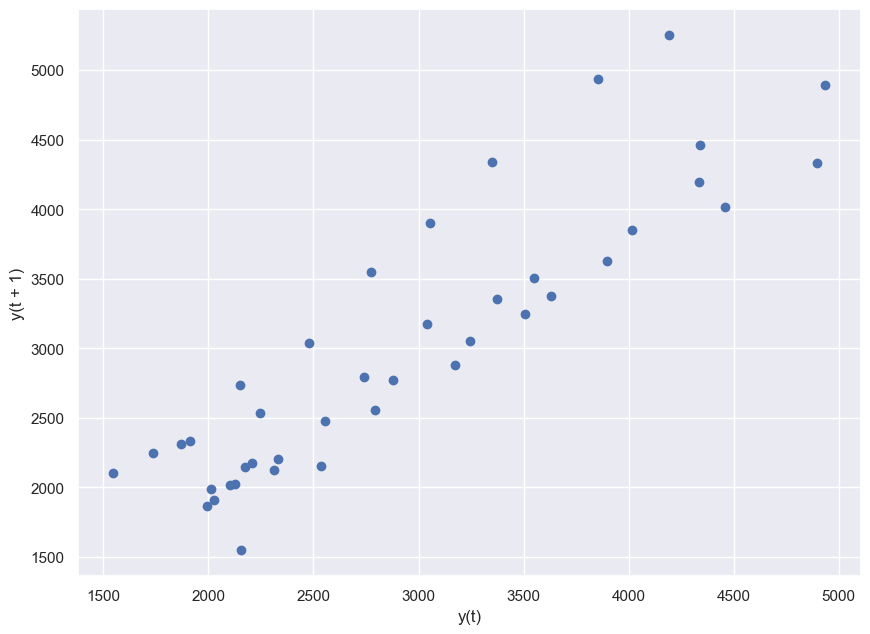

In [19]:
from pandas.plotting import lag_plot
lag_plot(coca1['Sales'])
plt.show()


<Axes: xlabel='Year', ylabel='Sales'>

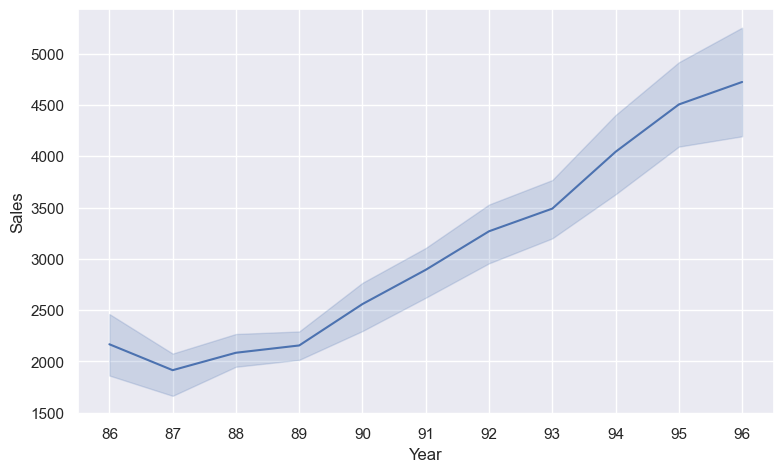

In [20]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=coca1)

<Axes: xlabel='Quarters', ylabel='Year'>

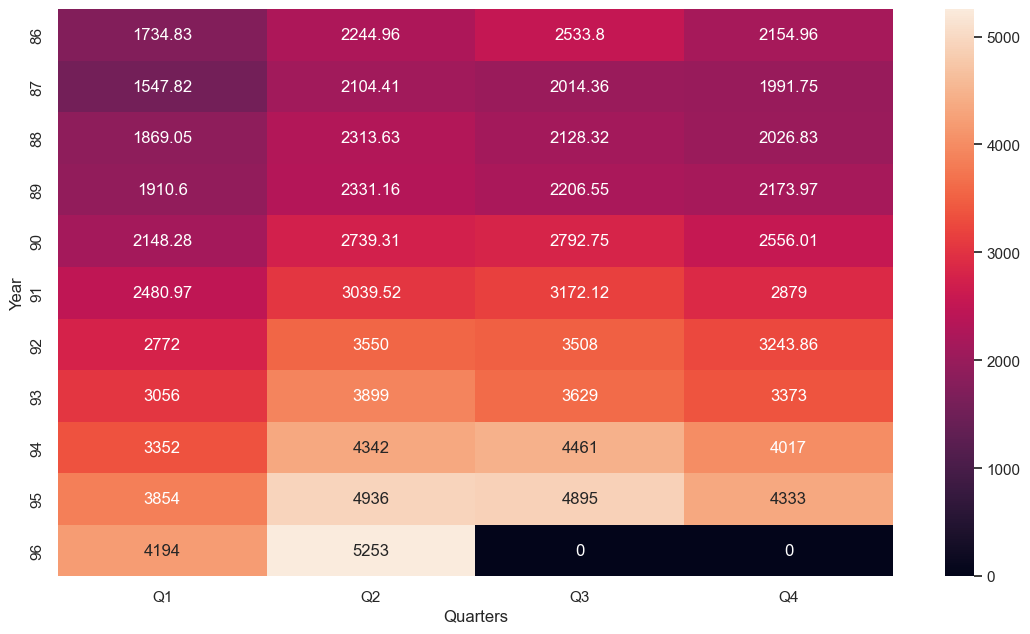

In [21]:
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=coca1,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")


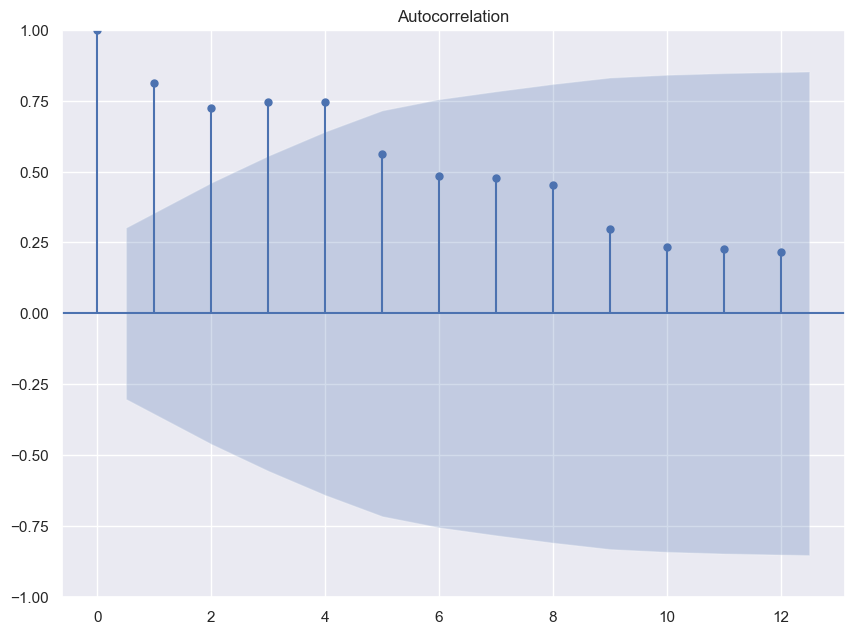

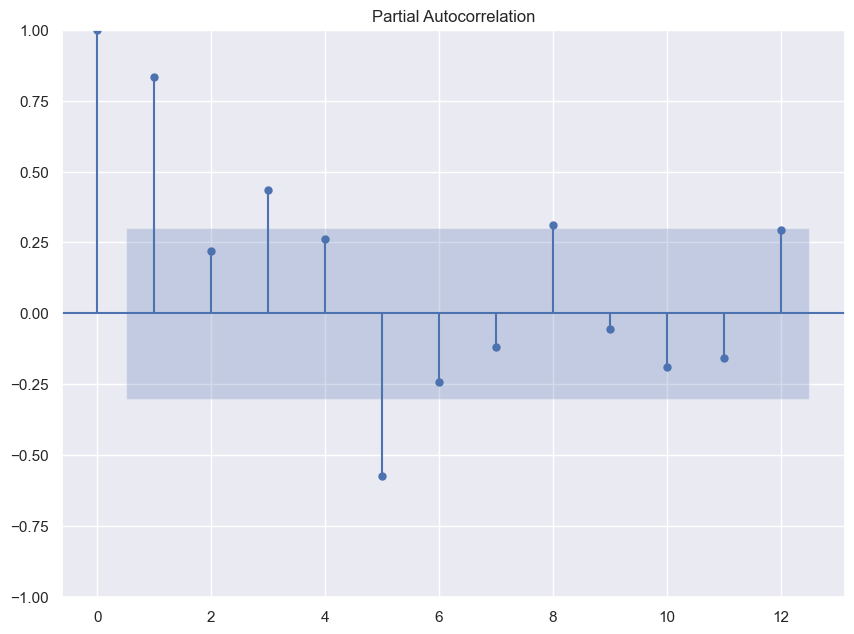

In [22]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coca1.Sales,lags=12)
tsa_plots.plot_pacf(coca1.Sales,lags=12)
plt.show()


# Data Driven Forecasting Methods


In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# Splitting Data


In [24]:
Train = coca1.head(30)
Test = coca.tail(11)

In [25]:
Train

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [26]:
Test

,Quarter,Sales
31,Q4_93,3373.0
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0


# Moving Average Method


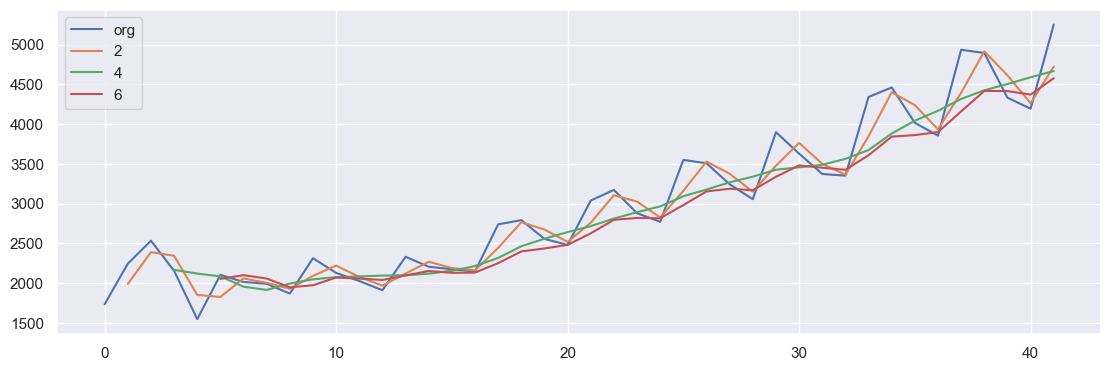

In [27]:
plt.figure(figsize=(12,4))
coca1.Sales.plot(label="org")
for i in range(2,8,2):
    coca1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot


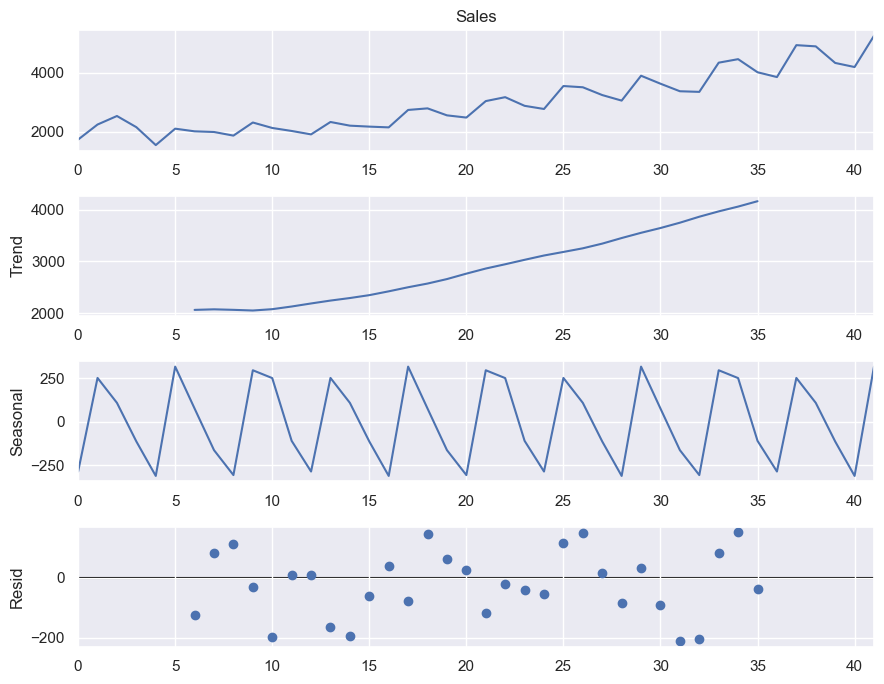

In [28]:
decompose_ts_add = seasonal_decompose(coca1.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# Evaluation Metric RMSE


In [29]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

# Simple Exponential Method


In [30]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales,pred_ses)
rmse_ses_model

899.0814363573165

# Holt method

In [31]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales,pred_hw)

In [32]:
rmse_hw_model

540.1633888777571

# Holts winter exponential smoothing with additive seasonality and additive trend


In [33]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

238.63528155535033

# Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [34]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

185.30139094804184

# Model based Forecasting Methods


In [35]:
coca1["t"] = np.arange(1,43)
coca1["t_squared"] = coca1["t"]*coca1["t"]

coca1["log_sales"] = np.log(coca1["Sales"])

coca1.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [36]:
# Splitting data into Train and Test (77/33)
Train = coca1.head(32)
Test = coca1.tail(10)

In [37]:
Train

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [38]:
Test

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
32,Q1_94,3352.0,Q1,94,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,94,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,94,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,94,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,95,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,95,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,96,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,96,0,1,0,0,42,1764,8.566555


# Linear Model


In [39]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767121

# Quadratic Model


In [40]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.73573554073874

# Exponential Model


In [41]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076458

# Additive Seasonality Quadratic model


In [46]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model    

277.35107711287395

# Additive Seasonality model


In [47]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model                        




277.35107711287395

# Multiplicative Seasonality model


In [48]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.2503948361186

# Multiplicative Additive Seasonality model


In [49]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_Add_sea = RMSE(Test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.8678182691646

In [52]:
rmse_ses_model = 0.1
rmse_hw_model = 0.2
rmse_hwe_add_add_model = 0.3
rmse_hwe_model_mul_add_model = 0.4
rmse_linear_model = 0.5
rmse_Exp_model = 0.6
rmse_Quad_model = 0.7
rmse_add_sea = 0.8
rmse_add_sea_Quad_model = 0.9
rmse_Mul_sea = 1.0
rmse_Mul_Add_sea = 1.1

In [53]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]

In [54]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,0.1
1,Holt method,0.2
2,HW exp smoothing add,0.3
3,HW exp smoothing mult,0.4
4,Linear Mode,0.5
5,Exp model,0.6
6,Quad model,0.7
7,add seasonality,0.8
8,Quad add seasonality,0.9
9,Mult Seasonality,1.0


# Building final model with least RMSE value


In [56]:
coca1.head()


,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [63]:
data = coca1[['Q1', 'Q2', 'Q3', 't', 't_squared']]


In [65]:
sales_data = coca1['Sales']


In [67]:
final_model = smf.ols('Sales ~ t + t_squared + Q1 + Q2 + Q3', data=coca1).fit()
pred_final = pd.Series(final_model.predict(data))
rmse_final_model = RMSE(sales_data, pred_final)
rmse_final_model

159.05522576522478

In [69]:
pred_df = pd.DataFrame({'Actual' : sales_data, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


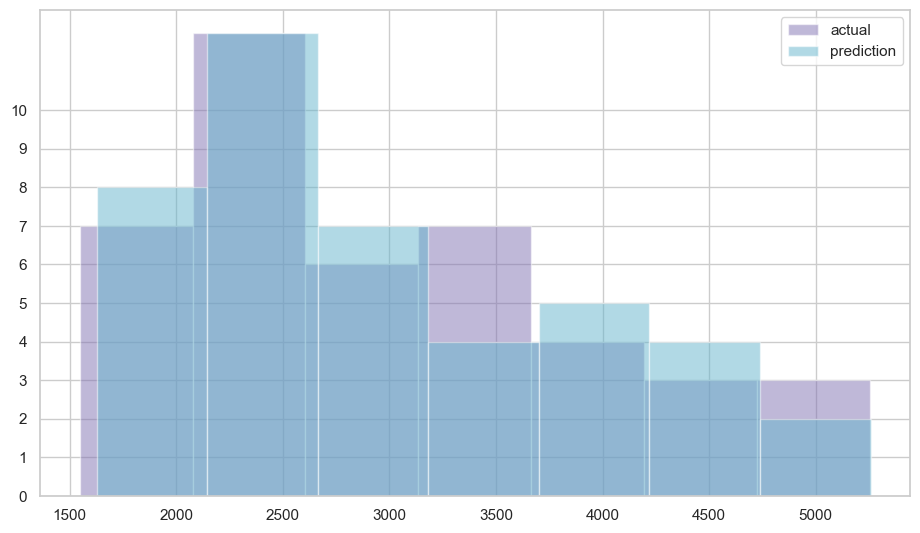

In [71]:
# Actual Vs Predicted graph

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6) 
_, ax = plt.subplots()
ax.hist(sales_data, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred_final, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

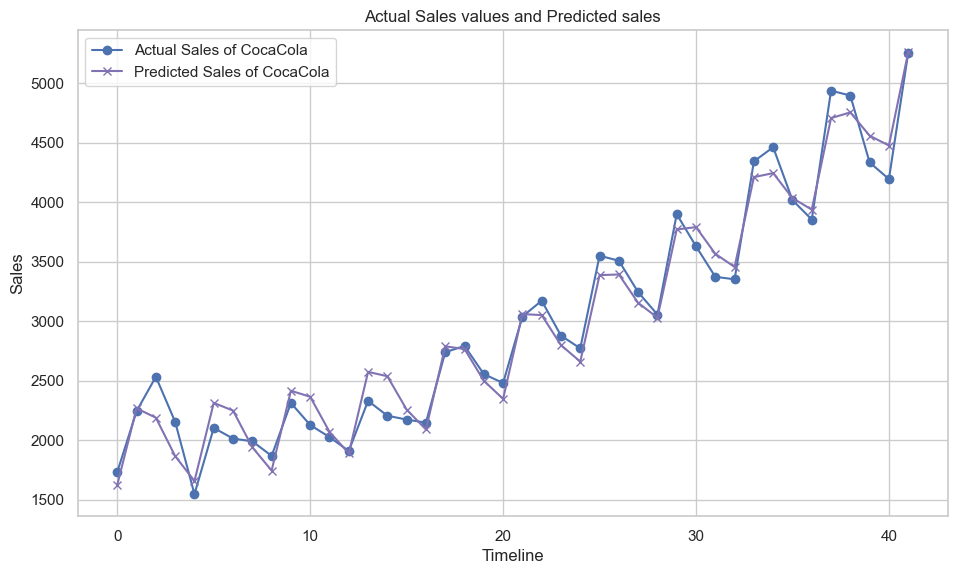

In [73]:
# Plot of Actual Sales values and Predicted sales values
plt.plot(sales_data, color='b',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final, color='m',marker='x', label='Predicted Sales of CocaCola')

# Added titles and adjust dimensions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (10,8) 

plt.show()